In [150]:
##PRE-TRAITEMENT 
import pandas as pd
s1_df = pd.read_pickle("./PPG_FieldStudy/S1/S1.pkl")

In [88]:
s1_df.keys()

dict_keys(['rpeaks', 'signal', 'label', 'activity', 'questionnaire', 'subject'])

In [89]:
 x = s1_df.copy()

In [90]:
 x["activity"].shape

(36848, 1)

In [6]:
 x["label"].shape

(4603,)

In [7]:
 x["questionnaire"]

{'WEIGHT': 78.0,
 'Gender': ' m',
 'AGE': 34,
 'HEIGHT': 182.0,
 'SKIN': 3,
 'SPORT': 6}

In [8]:
 x["rpeaks"].shape

(11431,)

In [9]:
 x["signal"] 

{'chest': {'ACC': array([[ 0.85640001, -0.06779999, -0.36559999],
         [ 0.8556    , -0.06900001, -0.3646    ],
         [ 0.852     , -0.07020003, -0.3642    ],
         ...,
         [ 0.88759995, -0.1038    , -0.27920002],
         [ 0.88619995, -0.10159999, -0.27819997],
         [ 0.88680005, -0.10140002, -0.27380002]]), 'ECG': array([[0.01560974],
         [0.01812744],
         [0.01753235],
         ...,
         [0.21368408],
         [0.21556091],
         [0.21702576]]), 'EMG': array([[-1.5],
         [-1.5],
         [-1.5],
         ...,
         [-1.5],
         [-1.5],
         [-1.5]]), 'EDA': array([[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]), 'Temp': array([[-273.15],
         [-273.15],
         [-273.15],
         ...,
         [-273.15],
         [-273.15],
         [-273.15]], dtype=float32), 'Resp': array([[ 4.4418335 ],
         [ 4.45098877],
         [ 4.47387695],
         ...,
         [-3.05023193],
  

In [10]:
pd.DataFrame(x["signal"])

,chest,wrist
ACC,"[[0.8564000129699707, -0.06779998540878296, -0...","[[-0.765625, -0.078125, 0.671875], [-0.765625,..."
ECG,"[[0.015609741210937498], [0.01812744140625], [...",NaN
EMG,"[[-1.5], [-1.5], [-1.5], [-1.5], [-1.5], [-1.5...",NaN
EDA,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[4.722437], [4.728843], [4.718594], [4.717312..."
Temp,"[[-273.15], [-273.15], [-273.15], [-273.15], [...",NaN
Resp,"[[4.44183349609375], [4.45098876953125], [4.47...",NaN
BVP,NaN,"[[7.28], [6.33], [5.46], [4.6], [3.74], [2.86]..."
TEMP,NaN,"[[32.13], [32.16], [32.16], [32.16], [32.16], ..."


In [12]:
dfs  = []
pbms = []
oks  = []
print(f"all keys : {s1_df.keys()}")
for k in s1_df.keys():
    try:
        df = pd.DataFrame(s1_df[k]) 
        dfs.append(df)
        oks.append(k)
    except Exception as e:
        pbms.append(k + str(e))
print(f"clefs ok = {oks}")
print(f"clefs avec un pbms = {pbms}")

all keys : dict_keys(['rpeaks', 'signal', 'label', 'activity', 'questionnaire', 'subject'])
clefs ok = ['rpeaks', 'signal', 'label', 'activity']
clefs avec un pbms = ['questionnaireIf using all scalar values, you must pass an index', 'subjectDataFrame constructor not properly called!']


In [13]:
for df in dfs:
    print(df.shape)
    print(df.head(2))

(11431, 1)
      0
0   240
1  1174
(8, 2)
                                                 chest  \
ACC  [[0.8564000129699707, -0.06779998540878296, -0...   
ECG  [[0.015609741210937498], [0.01812744140625], [...   

                                                 wrist  
ACC  [[-0.765625, -0.078125, 0.671875], [-0.765625,...  
ECG                                                NaN  
(4603, 1)
           0
0  49.611369
1  50.323992
(36848, 1)
     0
0  0.0
1  0.0


In [14]:
 dfs[2][0].unique()

array([49.61136908, 50.32399248, 52.70833578, ..., 84.004991  ,
       85.79625673, 87.4113988 ])

In [15]:
 dfs[2].shape

(4603, 1)

In [16]:
 dfs[2][0][1]

50.323992482870175

In [17]:
newLabel = []
for i in range(len(dfs[2])):
    for x in range(8):
        newLabel.append(dfs[2][0][i])

In [18]:
 newLabel = pd.DataFrame(newLabel)

In [19]:
 newLabel.shape

(36824, 1)

In [20]:
frames = []
for i in range(0, 24) :
  frames.append(newLabel.iloc[36823])

lastValues = pd.concat(frames)
lastValues.head()

newLabel = pd.concat([newLabel, lastValues], ignore_index=True)

In [21]:
 newLabel.shape

(36848, 1)

In [22]:
 dfs[3].shape

(36848, 1)

In [23]:
 dfs[1]

,chest,wrist
ACC,"[[0.8564000129699707, -0.06779998540878296, -0...","[[-0.765625, -0.078125, 0.671875], [-0.765625,..."
ECG,"[[0.015609741210937498], [0.01812744140625], [...",NaN
EMG,"[[-1.5], [-1.5], [-1.5], [-1.5], [-1.5], [-1.5...",NaN
EDA,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[4.722437], [4.728843], [4.718594], [4.717312..."
Temp,"[[-273.15], [-273.15], [-273.15], [-273.15], [...",NaN
Resp,"[[4.44183349609375], [4.45098876953125], [4.47...",NaN
BVP,NaN,"[[7.28], [6.33], [5.46], [4.6], [3.74], [2.86]..."
TEMP,NaN,"[[32.13], [32.16], [32.16], [32.16], [32.16], ..."


In [24]:
 dfs[1]["chest"]

ACC     [[0.8564000129699707, -0.06779998540878296, -0...
ECG     [[0.015609741210937498], [0.01812744140625], [...
EMG     [[-1.5], [-1.5], [-1.5], [-1.5], [-1.5], [-1.5...
EDA     [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
Temp    [[-273.15], [-273.15], [-273.15], [-273.15], [...
Resp    [[4.44183349609375], [4.45098876953125], [4.47...
BVP                                                   NaN
TEMP                                                  NaN
Name: chest, dtype: object

In [25]:
index = [0, 3, 6, 7]

for i in index:
  print(dfs[1]["wrist"][i].shape)

(294784, 3)
(36848, 1)
(589568, 1)
(36848, 1)


In [26]:
 index = [0, 1, 2, 3, 4, 5]

for i in index:
  print(dfs[1]["chest"][i].shape)

(6448400, 3)
(6448400, 1)
(6448400, 1)
(6448400, 1)
(6448400, 1)
(6448400, 1)


In [27]:
i = 0
tabIndex = [] 
while i < 6448400 :
  tabIndex.append(i)
  i = i + 175

len(tabIndex)

36848

In [28]:
 type(dfs[1]["chest"][0])

numpy.ndarray

In [29]:
newChestACC = [dfs[1]["chest"][0][x-1] for x in tabIndex]

newChestECG = [dfs[1]["chest"][1][x-1] for x in tabIndex]

newChestResp = [dfs[1]["chest"][5][x-1] for x in tabIndex]

ChestACC = pd.DataFrame(newChestACC)
ChestECG = pd.DataFrame(newChestECG)
ChestResp = pd.DataFrame(newChestResp)

In [30]:
#tabIndexACC
i = 0
tabIndexACC = [] 
# i jusque l'index max 
while i < 294784 :
  tabIndexACC.append(i)
  i = i + 8

len(tabIndexACC)

#tabIndexACC
i = 0
tabIndexBVP = [] 
# i jusque l'index max 
while i < 589568 :
  tabIndexBVP.append(i)
  i = i + 16

len(tabIndexBVP)

36848

In [31]:
 newWristACC = [dfs[1]["wrist"][0][x-1] for x in tabIndexACC]

newWristBVP = [dfs[1]["wrist"][6][x-1] for x in tabIndexBVP]

WristACC = pd.DataFrame(newWristACC)
WristBVP = pd.DataFrame(newWristBVP)
WristEDA = pd.DataFrame(dfs[1]["wrist"][3])
WristTemp = pd.DataFrame(dfs[1]["wrist"][7])

In [34]:
 df1['Activity'] = dfs[3][0]
df1['ChestAccChannel1'] = ChestACC[0]
df1['ChestAccChannel2'] = ChestACC[1]
df1['ChestAccChannel3'] = ChestACC[2]
df1['ChestECG'] = ChestECG[0]
df1['ChestResp'] = ChestResp[0]
df1['WristAccChannel1'] = WristACC[0]
df1['WristAccChannel2'] = WristACC[1]
df1['WristAccChannel3'] = WristACC[2]
df1['WristBVP'] = WristBVP[0]
df1['WristEDA'] = WristEDA[0]
df1['WristTemp'] = WristTemp[0]
df1['Subject'] = "S1"

In [35]:
 df1["Label"] = newLabel[0]

In [36]:
df1.head()

,Subject,Activity,ChestAccChannel1,ChestAccChannel2,ChestAccChannel3,ChestECG,ChestResp,WristAccChannel1,WristAccChannel2,WristAccChannel3,WristBVP,WristEDA,WristTemp,Label
0,S1,0.0,0.8868,-0.1014,-0.2738,0.217026,-3.056335,-0.375000,0.000000,0.937500,111.06,4.722437,32.13,49.611369
1,S1,0.0,0.8498,-0.0630,-0.3676,-0.015930,4.914856,-0.765625,-0.078125,0.671875,-9.84,4.728843,32.16,49.611369
2,S1,0.0,0.8504,-0.0648,-0.3706,-0.006912,3.370667,-0.750000,-0.078125,0.671875,-46.31,4.718594,32.16,49.611369
3,S1,0.0,0.8602,-0.0658,-0.3658,-0.338058,0.746155,-0.765625,-0.078125,0.671875,1.74,4.717312,32.16,49.611369
4,S1,0.0,0.8518,-0.0658,-0.3724,-0.091919,-1.420593,-0.765625,-0.078125,0.671875,34.08,4.713469,32.16,49.611369


In [37]:
df1["Age"] = 34
df1["Gender"] = "m"
df1["Height"] = 182.0
df1["Skin"] = 3
df1["Sport"] = 6
df1["Weight"] = 78.0

In [38]:
 df1.shape

(36848, 20)

In [39]:
dfS1 = df1.copy()

In [40]:
 df1.to_csv('S1.csv')

In [92]:
 listDeSXDFs = []

for x in listDeSX :
  listDeSXDFs.append(splitDataframe(x))


In [48]:
 def splitDataframe(dict) :
  dfs  = []
  pbms = []
  oks  = []
  #print(f"all keys : {dict.keys()}")
  for k in dict.keys():
      try:
          df = pd.DataFrame(dict[k]) 
          dfs.append(df)
          oks.append(k)
      except Exception as e:
          pbms.append(k + str(e))
  #print(f"clefs ok = {oks}")
  #print(f"clefs avec un pbms = {pbms}")
  return dfs

In [49]:
 listDeSXDFs = []
for x in listDeSX :
  listDeSXDFs.append(splitDataframe(x))


S2 en cours de traitement
S3 en cours de traitement
S4 en cours de traitement
S5 en cours de traitement
S6 en cours de traitement
S7 en cours de traitement
S8 en cours de traitement
S9 en cours de traitement
S10 en cours de traitement
S11 en cours de traitement
S12 en cours de traitement
S13 en cours de traitement
S14 en cours de traitement
S15 en cours de traitement


In [53]:
len(listDeSXDFs[0][2])

4099

In [54]:
len(listDeSXDFs[0][3])

32820

In [55]:
 def labelHydrator(dfs) :
  #index 2 label
  #index 3 activity
  lenLabel = len(dfs[2])
  lenActivity = len(dfs[3])

  # On duplique x8 le label
  newLabel = []
  for i in range(lenLabel):
      for x in range(8):
          newLabel.append(dfs[2][0][i])
  
  lenNewLabel = len(newLabel)
  if (lenNewLabel != lenActivity) :
    #on peuple le reste avec la dernière valeur
    for i in range(0, lenActivity-lenNewLabel) :
      newLabel.append(newLabel[lenNewLabel-1])

  if (len(newLabel) == lenActivity) :
    print("Ok pour le df ci-dessus")

  newLabel = pd.DataFrame(newLabel)
  return newLabel

In [56]:
listDeNewLabels = []
for x in listDeSXDFs :
  newLab = labelHydrator(x)
  listDeNewLabels.append(newLab)

S2 en cours de traitement
Ok pour le df ci-dessus
S3 en cours de traitement
Ok pour le df ci-dessus
S4 en cours de traitement
Ok pour le df ci-dessus
S5 en cours de traitement
Ok pour le df ci-dessus
S6 en cours de traitement
Ok pour le df ci-dessus
S7 en cours de traitement
Ok pour le df ci-dessus
S8 en cours de traitement
Ok pour le df ci-dessus
S9 en cours de traitement
Ok pour le df ci-dessus
S10 en cours de traitement
Ok pour le df ci-dessus
S11 en cours de traitement
Ok pour le df ci-dessus
S12 en cours de traitement
Ok pour le df ci-dessus
S13 en cours de traitement
Ok pour le df ci-dessus
S14 en cours de traitement
Ok pour le df ci-dessus
S15 en cours de traitement
Ok pour le df ci-dessus


In [58]:
def chestTreatement(dfs) :
  #index 1 signal
  i = 0
  tabIndex = [] 
  while i < len(dfs[1]["chest"][0]) :
    tabIndex.append(i)
    i = i + 175

  newChestACC = [dfs[1]["chest"][0][x-1] for x in tabIndex]

  newChestECG = [dfs[1]["chest"][1][x-1] for x in tabIndex]

  newChestResp = [dfs[1]["chest"][5][x-1] for x in tabIndex]

  ChestACC = pd.DataFrame(newChestACC)
  ChestECG = pd.DataFrame(newChestECG)
  ChestResp = pd.DataFrame(newChestResp)

  #taille d'activity
  if len(newChestACC) == len(dfs[3]) :
    print("Ok pour ChestACC du DF ci-dessus")
  if len(newChestECG) == len(dfs[3]) :
    print("Ok pour ChestECG du DF ci-dessus")
  if len(newChestResp) == len(dfs[3]) :
    print("Ok pour ChestResp du DF ci-dessus")
  
  list = []

  list.append(ChestACC)
  list.append(ChestECG)
  list.append(ChestResp)

  return list

In [94]:
listDeNewChest = []
for x in listDeSXDFs :  
  listDeNewChest.append(chestTreatement(x)) 

Ok pour ChestACC du DF ci-dessus
Ok pour ChestECG du DF ci-dessus
Ok pour ChestResp du DF ci-dessus
Ok pour ChestACC du DF ci-dessus
Ok pour ChestECG du DF ci-dessus
Ok pour ChestResp du DF ci-dessus
Ok pour ChestACC du DF ci-dessus
Ok pour ChestECG du DF ci-dessus
Ok pour ChestResp du DF ci-dessus
Ok pour ChestACC du DF ci-dessus
Ok pour ChestECG du DF ci-dessus
Ok pour ChestResp du DF ci-dessus
Ok pour ChestACC du DF ci-dessus
Ok pour ChestECG du DF ci-dessus
Ok pour ChestResp du DF ci-dessus
Ok pour ChestACC du DF ci-dessus
Ok pour ChestECG du DF ci-dessus
Ok pour ChestResp du DF ci-dessus
Ok pour ChestACC du DF ci-dessus
Ok pour ChestECG du DF ci-dessus
Ok pour ChestResp du DF ci-dessus
Ok pour ChestACC du DF ci-dessus
Ok pour ChestECG du DF ci-dessus
Ok pour ChestResp du DF ci-dessus
Ok pour ChestACC du DF ci-dessus
Ok pour ChestECG du DF ci-dessus
Ok pour ChestResp du DF ci-dessus
Ok pour ChestACC du DF ci-dessus
Ok pour ChestECG du DF ci-dessus
Ok pour ChestResp du DF ci-dessus


In [61]:
def WristTreatement(dfs) :
  #index 1 signal
  i = 0
  tabIndexACC = [] 
  # i jusque l'index max 
  while i < len(dfs[1]["wrist"][0]) :
    tabIndexACC.append(i)
    i = i + 8

  #tabIndexACC
  j = 0
  tabIndexBVP = [] 
  # i jusque l'index max 
  while j < len(dfs[1]["wrist"][6]) :
    tabIndexBVP.append(i)
    j = j + 16

  newWristACC = [dfs[1]["wrist"][0][x-1] for x in tabIndexACC]

  newWristBVP = [dfs[1]["wrist"][6][x-1] for x in tabIndexBVP]

  #taille d'activity
  if len(newWristACC) == len(dfs[3]) :
    print("Ok pour WristACC du DF ci-dessus")
  if len(newWristBVP) == len(dfs[3]) :
    print("Ok pour WristVBP du DF ci-dessus")
  
  list = []

  list.append(pd.DataFrame(newWristACC))
  list.append(pd.DataFrame(newWristBVP))
  WristEDA = pd.DataFrame(dfs[1]["wrist"][3])
  WristTemp = pd.DataFrame(dfs[1]["wrist"][7])
  list.append(WristEDA)
  list.append(WristTemp)

  return list

In [93]:
listDeNewWrist = []
for x in listDeSXDFs :  
  listDeNewWrist.append(WristTreatement(x)) 

Ok pour WristACC du DF ci-dessus
Ok pour WristVBP du DF ci-dessus
Ok pour WristACC du DF ci-dessus
Ok pour WristVBP du DF ci-dessus
Ok pour WristACC du DF ci-dessus
Ok pour WristVBP du DF ci-dessus
Ok pour WristACC du DF ci-dessus
Ok pour WristVBP du DF ci-dessus
Ok pour WristACC du DF ci-dessus
Ok pour WristVBP du DF ci-dessus
Ok pour WristACC du DF ci-dessus
Ok pour WristVBP du DF ci-dessus
Ok pour WristACC du DF ci-dessus
Ok pour WristVBP du DF ci-dessus
Ok pour WristACC du DF ci-dessus
Ok pour WristVBP du DF ci-dessus
Ok pour WristACC du DF ci-dessus
Ok pour WristVBP du DF ci-dessus
Ok pour WristACC du DF ci-dessus
Ok pour WristVBP du DF ci-dessus
Ok pour WristACC du DF ci-dessus
Ok pour WristVBP du DF ci-dessus
Ok pour WristACC du DF ci-dessus
Ok pour WristVBP du DF ci-dessus
Ok pour WristACC du DF ci-dessus
Ok pour WristVBP du DF ci-dessus
Ok pour WristACC du DF ci-dessus
Ok pour WristVBP du DF ci-dessus


In [63]:
 listDeNewWrist[0][0]
    

,0,1,2
0,-0.375000,1.062500,0.390625
1,-0.562500,0.046875,0.843750
2,-0.562500,0.046875,0.843750
3,-0.578125,0.046875,0.828125
4,-0.578125,0.046875,0.828125
...,...,...,...
32815,-0.875000,-0.468750,0.156250
32816,-0.890625,-0.453125,0.109375
32817,-0.859375,-0.421875,0.109375
32818,-0.734375,-0.031250,0.078125


In [64]:
  print(listDeNewChest[13])

[            0       1       2
0      0.9006  0.0058 -0.1888
1      0.8418  0.2074 -0.2318
2      0.8696  0.1694 -0.0550
3      0.7682 -0.0682  0.0130
4      0.8810  0.0106 -0.0902
...       ...     ...     ...
31751  0.8890  0.0104 -0.2322
31752  0.8970 -0.0184 -0.2230
31753  0.9028 -0.0002 -0.2046
31754  0.8906 -0.0118 -0.2182
31755  0.8894  0.0318 -0.2006

[31756 rows x 3 columns],               0
0      0.023666
1     -0.171341
2      0.017441
3     -0.251999
4      0.126205
...         ...
31751 -0.282394
31752  0.060379
31753  0.015244
31754 -0.304092
31755 -0.069717

[31756 rows x 1 columns],                0
0      -1.220703
1      -0.749207
2       6.459045
3      13.970947
4      15.345764
...          ...
31751   2.790833
31752   0.599670
31753  -1.084900
31754  -2.049255
31755  -2.510071

[31756 rows x 1 columns]]


In [65]:
i = 0
listDeDfFinaux = [] 
for x in listDeSXDFs :
  print("S" + str(i+2) + " en cours de traitement")
  
  df1 = pd.DataFrame(columns = ['Subject', 'Activity'])
  df1['Activity'] = x[3][0]
 
  df1['ChestAccChannel1'] = listDeNewChest[i][0][0]
  df1['ChestAccChannel2'] = listDeNewChest[i][0][1]
  df1['ChestAccChannel3'] = listDeNewChest[i][0][2]
  df1['ChestECG'] = listDeNewChest[i][1][0]
  df1['ChestResp'] = listDeNewChest[i][2][0]
  df1['WristAccChannel1'] = listDeNewWrist[i][0][0]
  df1['WristAccChannel2'] = listDeNewWrist[i][0][1]
  df1['WristAccChannel3'] = listDeNewWrist[i][0][2]
  df1['WristBVP'] = listDeNewWrist[i][1]
  df1['WristEDA'] = listDeNewWrist[i][2]
  df1['WristTemp'] = listDeNewWrist[i][3]
  df1["Label"] = listDeNewLabels[i][0]
  df1['Subject'] = listDeSX[i]["subject"]
  # from questionnaires
  df1["Age"] = listDeSX[i]["questionnaire"]["AGE"]
  df1["Gender"] = listDeSX[i]["questionnaire"]["Gender"]
  df1["Height"] = listDeSX[i]["questionnaire"]["HEIGHT"]
  df1["Skin"] = listDeSX[i]["questionnaire"]["SKIN"]
  df1["Sport"] = listDeSX[i]["questionnaire"]["SPORT"]
  df1["Weight"] = listDeSX[i]["questionnaire"]["WEIGHT"]

  listDeDfFinaux.append(df1)

  i = i + 1 

S2 en cours de traitement
S3 en cours de traitement
S4 en cours de traitement
S5 en cours de traitement
S6 en cours de traitement
S7 en cours de traitement
S8 en cours de traitement
S9 en cours de traitement
S10 en cours de traitement
S11 en cours de traitement
S12 en cours de traitement
S13 en cours de traitement
S14 en cours de traitement
S15 en cours de traitement


In [66]:
i = 2 
for x in listDeDfFinaux :
  x.to_csv('S'+str(i)+'.csv')

S2 en cours de traitement
S3 en cours de traitement
S4 en cours de traitement
S5 en cours de traitement
S6 en cours de traitement
S7 en cours de traitement
S8 en cours de traitement
S9 en cours de traitement
S10 en cours de traitement
S11 en cours de traitement
S12 en cours de traitement
S13 en cours de traitement
S14 en cours de traitement
S15 en cours de traitement


In [67]:
ls

 Le volume dans le lecteur C n'a pas de nom.
 Le num‚ro de s‚rie du volume est AC3D-F2CE

 R‚pertoire de C:\Users\33614\Desktop\DataVizProjet

01/02/2020  04:36    <DIR>          .
01/02/2020  04:36    <DIR>          ..
31/01/2020  03:59    <DIR>          .ipynb_checkpoints
31/01/2020  00:50    <DIR>          PPG_FieldStudy
31/01/2020  04:09                17 README.md
01/02/2020  04:17         7ÿ178ÿ086 S1.csv
01/02/2020  04:36         8ÿ405ÿ898 S10.csv
01/02/2020  04:36         7ÿ167ÿ035 S11.csv
01/02/2020  04:36         6ÿ253ÿ277 S12.csv
01/02/2020  04:36         7ÿ159ÿ037 S13.csv
01/02/2020  04:36         7ÿ097ÿ922 S14.csv
01/02/2020  04:36         6ÿ266ÿ475 S15.csv
01/02/2020  04:36         6ÿ429ÿ448 S2.csv
01/02/2020  04:36         6ÿ818ÿ030 S3.csv
01/02/2020  04:36         7ÿ152ÿ511 S4.csv
01/02/2020  04:36         7ÿ377ÿ509 S5.csv
01/02/2020  04:36         4ÿ119ÿ059 S6.csv
01/02/2020  04:36         7ÿ296ÿ709 S7.csv
01/02/2020  04:36         6ÿ274ÿ352 S8.csv
01/02/2020  04:36   

In [68]:
 listDeDfFinaux.append(dfS1)

In [69]:
fullDF = pd.concat(listDeDfFinaux)

In [70]:
 fullDF.to_csv("fullData.csv")

In [95]:
dfr=pd.read_csv("fullData.csv", sep=',', encoding='latin-1')

In [96]:
pd.options.display.max_columns =None

In [97]:
dfr.head(5)

,Unnamed: 0,Subject,Activity,ChestAccChannel1,ChestAccChannel2,ChestAccChannel3,ChestECG,ChestResp,WristAccChannel1,WristAccChannel2,WristAccChannel3,WristBVP,WristEDA,WristTemp,Label,Age,Gender,Height,Skin,Sport,Weight
0,0,S2,0.0,0.9162,0.0312,-0.0392,0.071228,4.338074,-0.375000,1.062500,0.390625,-80.38,0.267766,31.67,70.922966,28,m,189.0,3,5,80.0
1,1,S2,0.0,0.9130,0.0324,0.0478,0.113983,-2.784729,-0.562500,0.046875,0.843750,-80.38,0.262641,31.67,70.922966,28,m,189.0,3,5,80.0
2,2,S2,0.0,0.9138,0.0362,0.0558,-0.137283,-2.552795,-0.562500,0.046875,0.843750,-80.38,0.261360,31.67,70.922966,28,m,189.0,3,5,80.0
3,3,S2,0.0,0.9080,0.0166,0.0850,-0.063126,-2.798462,-0.578125,0.046875,0.828125,-80.38,0.260079,31.67,70.922966,28,m,189.0,3,5,80.0
4,4,S2,0.0,0.9146,0.0366,0.0846,1.487228,-4.518127,-0.578125,0.046875,0.828125,-80.38,0.261360,31.69,70.922966,28,m,189.0,3,5,80.0


In [98]:
dfr.shape


(517956, 21)

In [99]:
print(list(dfr.columns))

['Unnamed: 0', 'Subject', 'Activity', 'ChestAccChannel1', 'ChestAccChannel2', 'ChestAccChannel3', 'ChestECG', 'ChestResp', 'WristAccChannel1', 'WristAccChannel2', 'WristAccChannel3', 'WristBVP', 'WristEDA', 'WristTemp', 'Label', 'Age', 'Gender', 'Height', 'Skin', 'Sport', 'Weight']


In [102]:
 x = dfr.copy()

In [103]:
x["Subject"].unique()

array(['S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11',
       'S12', 'S13', 'S14', 'S15', 'S1'], dtype=object)

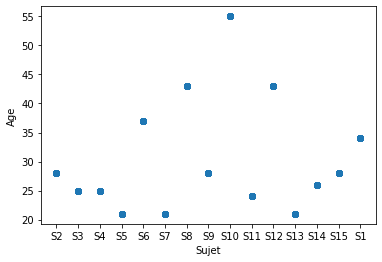

In [104]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x["Subject"], x["Age"])
plt.ylabel('Age')
plt.xlabel("Sujet")
plt.show()

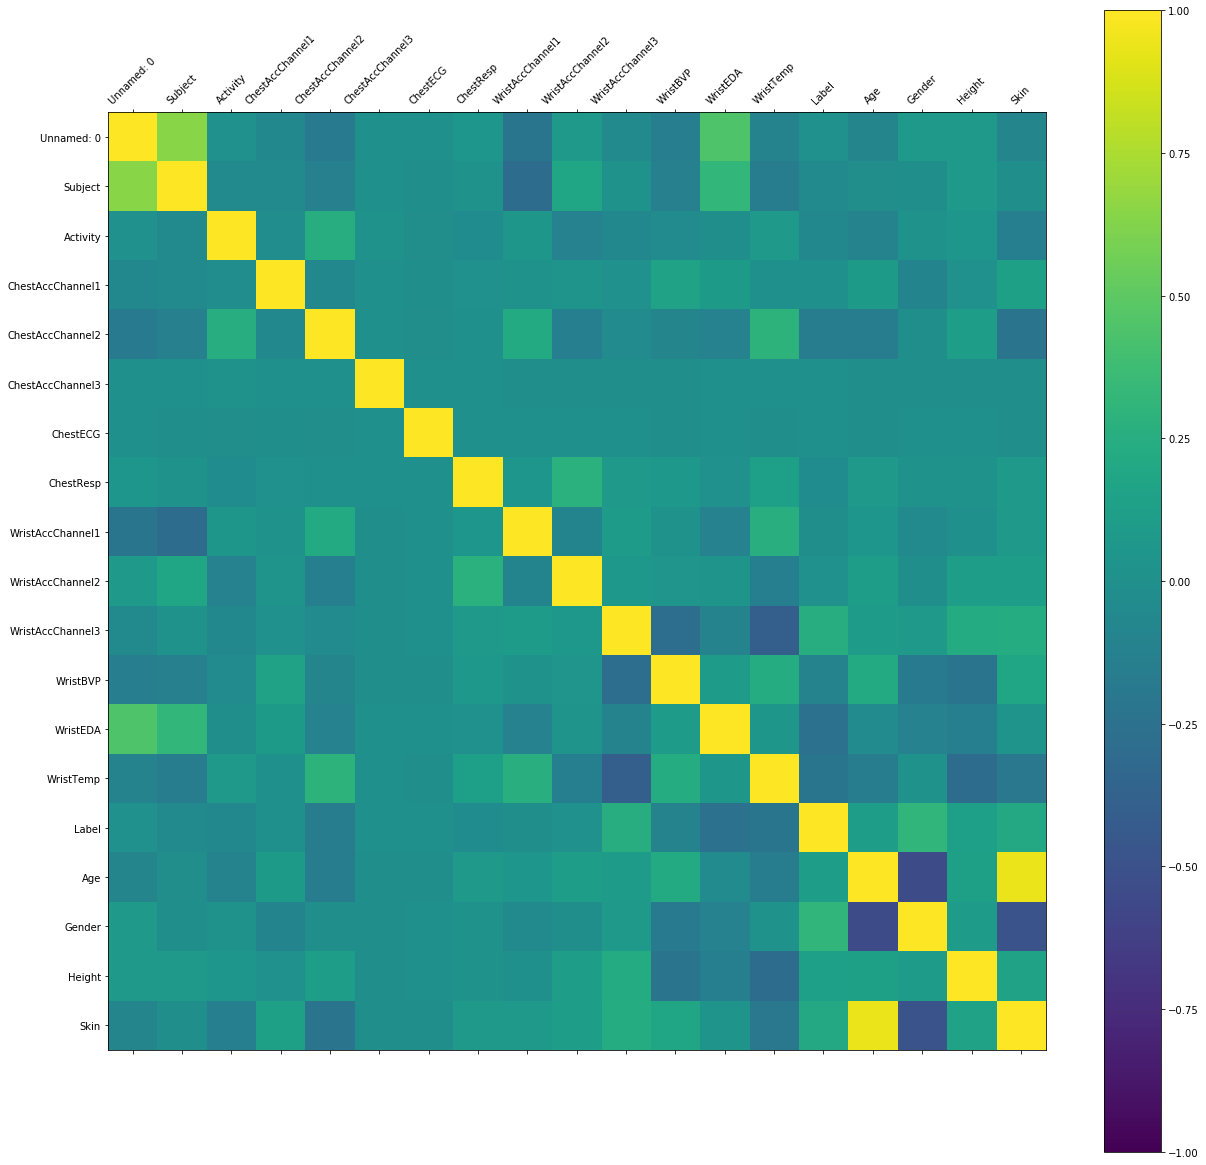

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
correlations = dfr.corr()
# plot correlation matrix
fig = plt.figure(figsize=(21, 21))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,19,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dfr.columns, rotation=45)
ax.set_yticklabels(dfr.columns)
plt.show()

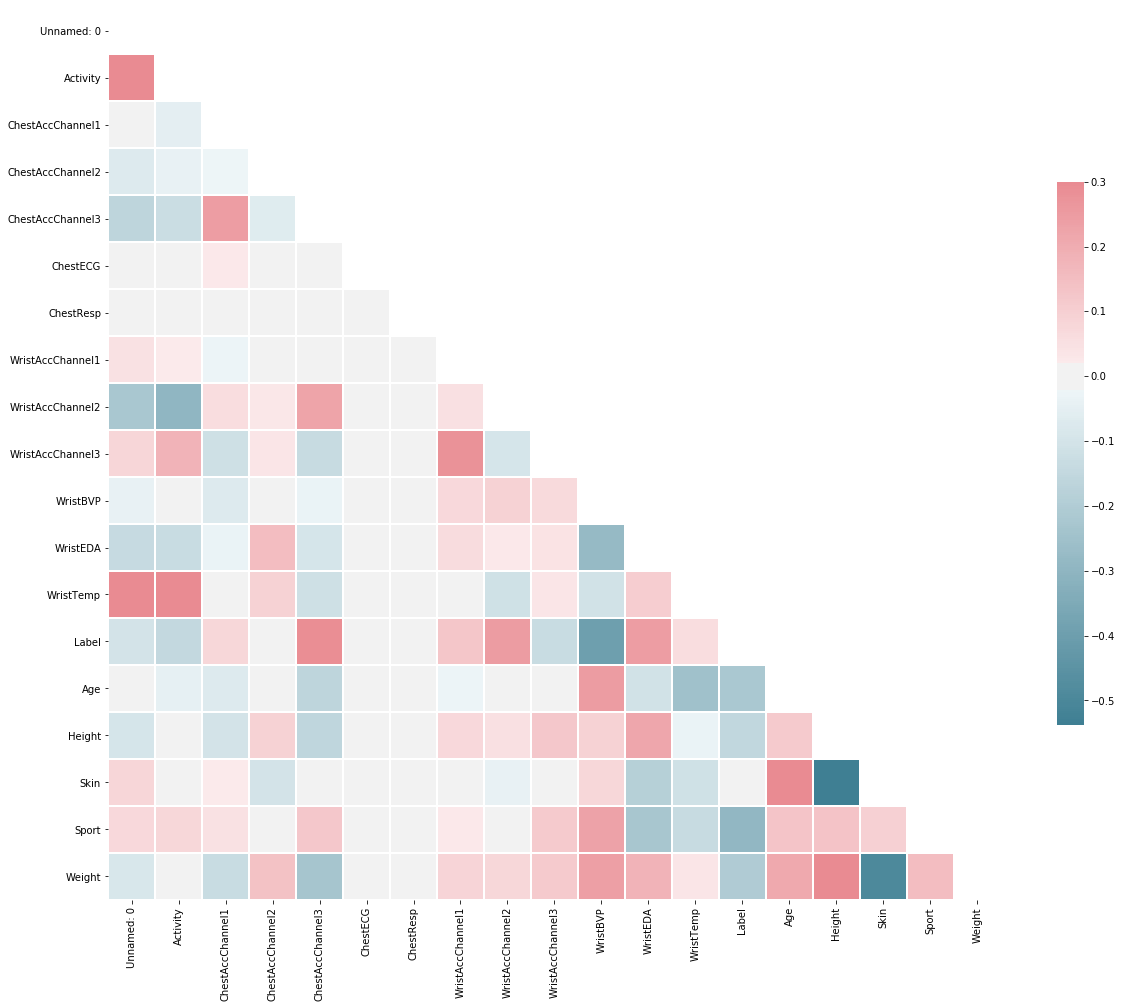

In [118]:

# Compute the correlation matrix
corr = dfr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [159]:
##CREATION DE MODELES
dfr

,Unnamed: 0,Subject,Activity,ChestAccChannel1,ChestAccChannel2,ChestAccChannel3,ChestECG,ChestResp,WristAccChannel1,WristAccChannel2,WristAccChannel3,WristBVP,WristEDA,WristTemp,Label,Age,Gender,Height,Skin,Sport,Weight
0,0,S2,0.0,0.9162,0.0312,-0.0392,0.071228,4.338074,-0.375000,1.062500,0.390625,-80.38,0.267766,31.67,70.922966,28,m,189.0,3,5,80.0
1,1,S2,0.0,0.9130,0.0324,0.0478,0.113983,-2.784729,-0.562500,0.046875,0.843750,-80.38,0.262641,31.67,70.922966,28,m,189.0,3,5,80.0
2,2,S2,0.0,0.9138,0.0362,0.0558,-0.137283,-2.552795,-0.562500,0.046875,0.843750,-80.38,0.261360,31.67,70.922966,28,m,189.0,3,5,80.0
3,3,S2,0.0,0.9080,0.0166,0.0850,-0.063126,-2.798462,-0.578125,0.046875,0.828125,-80.38,0.260079,31.67,70.922966,28,m,189.0,3,5,80.0
4,4,S2,0.0,0.9146,0.0366,0.0846,1.487228,-4.518127,-0.578125,0.046875,0.828125,-80.38,0.261360,31.69,70.922966,28,m,189.0,3,5,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517951,36843,S1,0.0,0.8968,-0.1138,-0.2486,-0.091324,-2.186584,-0.390625,-0.015625,0.937500,21.06,3.199053,34.37,87.411399,34,m,182.0,3,6,78.0
517952,36844,S1,0.0,0.8910,-0.1074,-0.2710,-0.163925,-1.922607,-0.406250,-0.046875,0.906250,120.82,3.186241,34.37,87.411399,34,m,182.0,3,6,78.0
517953,36845,S1,0.0,0.8786,-0.0952,-0.2940,0.071228,-2.622986,-0.359375,0.000000,0.953125,-36.32,3.170867,34.37,87.411399,34,m,182.0,3,6,78.0
517954,36846,S1,0.0,0.8828,-0.0956,-0.2848,-0.112381,-3.187561,-0.406250,-0.015625,0.921875,-5.94,3.159336,34.37,87.411399,34,m,182.0,3,6,78.0


In [127]:
X = dfr[['Weight', 'Age', 'Height', 'Skin', 'Sport','ChestResp','ChestECG','WristTemp','WristAccChannel1','WristAccChannel2','WristAccChannel3','WristBVP','WristEDA']]
y = dfr.Activity

In [126]:
from sklearn.model_selection import train_test_split
features = ['Weight', 'Age', 'Height', 'Skin', 'Sport','ChestResp','ChestECG','WristTemp','WristAccChannel1','WristAccChannel2','WristAccChannel3','WristBVP','WristEDA']
X.shape
y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((388467, 13), (129489, 13), (388467,), (129489,))

In [129]:
from sklearn.preprocessing import StandardScaler
scaler   = StandardScaler().fit(X_train)
X_train  = scaler.transform(X_train)
X_test   = scaler.transform(X_test)

In [130]:
resultat = dict()

In [132]:
import matplotlib.pyplot as plt
def get_score(algorithme, X_train, X_test, y_train, y_test, display_graph=False, display_options=True):
    if display_options:
        print("fitting :\n"+ str(algorithme))
        print("X_train:{} , X_test:{} ,  y_train:{} ,  y_test:{}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))
    modele = algorithme.fit(X_train, y_train)
    score  = modele.score(X_test, y_test)
    if display_graph:
        plt.scatter(x=y_test, y=algorithme.predict(X_test)) ## Predictions against True values
    return score

In [135]:
from sklearn.ensemble import RandomForestRegressor
hyperparametres = { 'n_estimators':30 }
algorithme = RandomForestRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, y_train, y_test)
resultat[algorithme] = score
score

fitting :
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
X_train:(388467, 13) , X_test:(129489, 13) ,  y_train:(388467,) ,  y_test:(129489,)


0.9523046089311167

In [137]:
from sklearn.tree import DecisionTreeClassifier
algorithme = DecisionTreeClassifier()
score = get_score(algorithme, *train_test_split(X, y, random_state=1234))
resultat[algorithme] = score
score

fitting :
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
X_train:(388467, 13) , X_test:(129489, 13) ,  y_train:(388467,) ,  y_test:(129489,)


0.9561275475136884

In [147]:
from sklearn.ensemble import ExtraTreesClassifier
algorithme = ExtraTreesClassifier()
score = get_score(algorithme, *train_test_split(X, y, random_state=1234))
resultat[algorithme] = score
score

fitting :
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
X_train:(388467, 13) , X_test:(129489, 13) ,  y_train:(388467,) ,  y_test:(129489,)


0.9756658866776329

In [145]:
from collections import OrderedDict
dico_ordonne = OrderedDict(resultat)
df = pd.DataFrame()
df["resultat"] = dico_ordonne.values()
df["algorithme"] = dico_ordonne.keys()
df['NOM_ALGO'] = df.algorithme.apply(lambda algorythme: str(algorithme).split('(')[0])
df.set_index('NOM_ALGO', inplace=True)
df

,resultat,algorythme
NOM_ALGO,,
RandomForestRegressor,0.952305,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio..."
DecisionTreeClassifier,0.956128,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
ExtraTreesClassifier,0.975774,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig..."


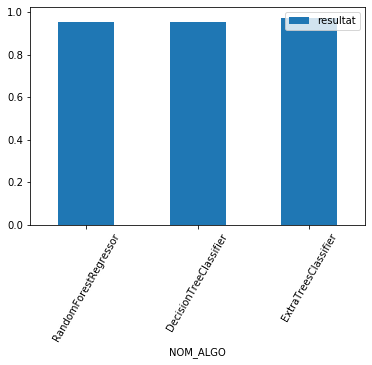

In [158]:
df[["resultat"]].plot(kind='bar', rot=60)

In [167]:
X_train_for_django = X_train
model_for_django = DecisionTreeClassifier()
model_for_django.fit(X_train_for_django, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [173]:
import pickle
path = './DjangoRestML/DjangoRestML/models/DecisionTreeClassifier'
with open(path, 'wb') as file:
    pickle.dump(algorithme, file)